In [179]:
import pandas as pd
import numpy as np

In [180]:
surprisehousing = pd.read_csv('../data/surprisehousing.csv')

In [181]:
surprisehousing.head(1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500


In [182]:
surprisehousing.shape

(1460, 81)

In [183]:
NA = surprisehousing.isnull().sum()

In [184]:
(NA [NA > 0])

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [185]:
(NA [NA > 0] / surprisehousing.shape[0]) * 100

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

In [186]:
## Alley, PoolQC, Fence, MiscFeature - These variables can be dropped

In [187]:
## But all of these may not be missing values - for example Alley

In [188]:
surprisehousing['Alley'].unique()
# Here missingness means something

array([nan, 'Grvl', 'Pave'], dtype=object)

In [189]:
surprisehousing['PoolQC'].unique()

array([nan, 'Ex', 'Fa', 'Gd'], dtype=object)

In [190]:
surprisehousing['Fence'].unique()

array([nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

In [191]:
surprisehousing['MiscFeature'].unique()

array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

In [192]:
# Missing value imputation
# Univariate and Bivariate analysis
# RFE
# VIF / p-value
# Lasso / Ridge

In [193]:
# We can easily remove MiscFeature because it does not give much information on a particular feature in anyway

In [194]:
# Regarding other missing variables, like Alley nan means no alley access, PoolQc nan means no pool, 
# Fence nan means no fence. Hence they can be replaced with categorical value instead of mode imputation

### EDA

### Missing values

In [195]:
# LotFrontage - mean imputed
# MasVnrType - mode imputed
# MasVnrArea - mean imputed
# BsmtQual - mode imputed
# BsmtCond - mode imputed
# BsmtExposure - mode imputed
# BsmtFinType1 - mode imputed
# Electrical - mode imputed
# FireplaceQu - mode imputed
# GarageType - mode imputed
# GarageYrBlt - mean imputed
# GarageFinish - mode imputed
# GarageQual - mode imputed
# GarageCond - mode imputed

#### Imputations

In [196]:
surprisehousing['LotFrontage'].fillna(surprisehousing['LotFrontage'].mean(),inplace=True)
surprisehousing['MasVnrType'].fillna(surprisehousing['MasVnrType'].mode()[0],inplace=True)
surprisehousing['MasVnrArea'].fillna(surprisehousing['MasVnrArea'].mean(),inplace=True)
surprisehousing['BsmtQual'].fillna(surprisehousing['BsmtQual'].mode()[0],inplace=True)
surprisehousing['BsmtCond'].fillna(surprisehousing['BsmtCond'].mode()[0],inplace=True)
surprisehousing['BsmtExposure'].fillna(surprisehousing['BsmtExposure'].mode()[0],inplace=True)
surprisehousing['BsmtFinType1'].fillna(surprisehousing['BsmtFinType1'].mode()[0],inplace=True)
surprisehousing['BsmtFinType2'].fillna(surprisehousing['BsmtFinType2'].mode()[0],inplace=True)
surprisehousing['Electrical'].fillna(surprisehousing['Electrical'].mode()[0],inplace=True)
surprisehousing['FireplaceQu'].fillna(surprisehousing['FireplaceQu'].mode()[0],inplace=True)
surprisehousing['GarageType'].fillna(surprisehousing['GarageType'].mode()[0],inplace=True)
surprisehousing['GarageYrBlt'].fillna(surprisehousing['GarageYrBlt'].mean(),inplace=True)
surprisehousing['GarageFinish'].fillna(surprisehousing['GarageFinish'].mode()[0],inplace=True)
surprisehousing['GarageQual'].fillna(surprisehousing['GarageQual'].mode()[0],inplace=True)
surprisehousing['GarageCond'].fillna(surprisehousing['GarageCond'].mode()[0],inplace=True)

In [197]:
surprisehousing['LotFrontage'].mean()

70.04995836802664

In [198]:
surprisehousing['MasVnrType'].mode()[0]

'None'

In [199]:
surprisehousing.isna().sum()[surprisehousing.isna().sum()>0]

Alley          1369
PoolQC         1453
Fence          1179
MiscFeature    1406
dtype: int64

In [200]:
## Now the above missing values are nothing but a category, so instead of imputation or removal we would 
##  do one hot encoding for them

In [201]:
surprisehousing['Alley'].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [202]:
# First make nan as No Alley - proper value, then encode (we will encode after checking the plots)

In [203]:
surprisehousing['Alley'].fillna('No Alley',inplace=True)

In [204]:
surprisehousing['Alley'].unique()

array(['No Alley', 'Grvl', 'Pave'], dtype=object)

In [205]:
surprisehousing['Alley'].unique()

array(['No Alley', 'Grvl', 'Pave'], dtype=object)

In [206]:
surprisehousing['PoolQC'].fillna('No Pool',inplace=True)
surprisehousing['PoolQC'].mask(surprisehousing['PoolQC'] == 'Ex', 'Excellent', inplace=True)
surprisehousing['PoolQC'].mask(surprisehousing['PoolQC'] == 'Fa', 'Fair', inplace=True)
surprisehousing['PoolQC'].mask(surprisehousing['PoolQC'] == 'Gd', 'Good', inplace=True)

In [207]:
surprisehousing['PoolQC'].unique()

array(['No Pool', 'Excellent', 'Fair', 'Good'], dtype=object)

In [208]:
surprisehousing['Fence'].unique()

array([nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

In [209]:
surprisehousing['Fence'].fillna('No Fence', inplace=True)
surprisehousing['Fence'].mask(surprisehousing['Fence'] == 'MnPrv', 'Min Privacy', inplace=True)
surprisehousing['Fence'].mask(surprisehousing['Fence'] == 'GdWo', 'Good Wood', inplace=True)
surprisehousing['Fence'].mask(surprisehousing['Fence'] == 'GdPrv', 'Good Privacy', inplace=True)
surprisehousing['Fence'].mask(surprisehousing['Fence'] == 'MnWw', 'Min wood wire', inplace=True)

In [210]:
surprisehousing['Fence'].unique()

array(['No Fence', 'Min Privacy', 'Good Wood', 'Good Privacy',
       'Min wood wire'], dtype=object)

In [211]:
# We can drop the MiscFeatures for now
surprisehousing.drop(['MiscFeature'],axis=1,inplace=True)

In [212]:
surprisehousing.isnull().sum().sum()

0

### Univariate and Bivariate Analysis

In [213]:
surprisehousing.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [214]:
import piplite
await piplite.install('seaborn')

In [215]:
import seaborn as sns
import matplotlib.pyplot as plt

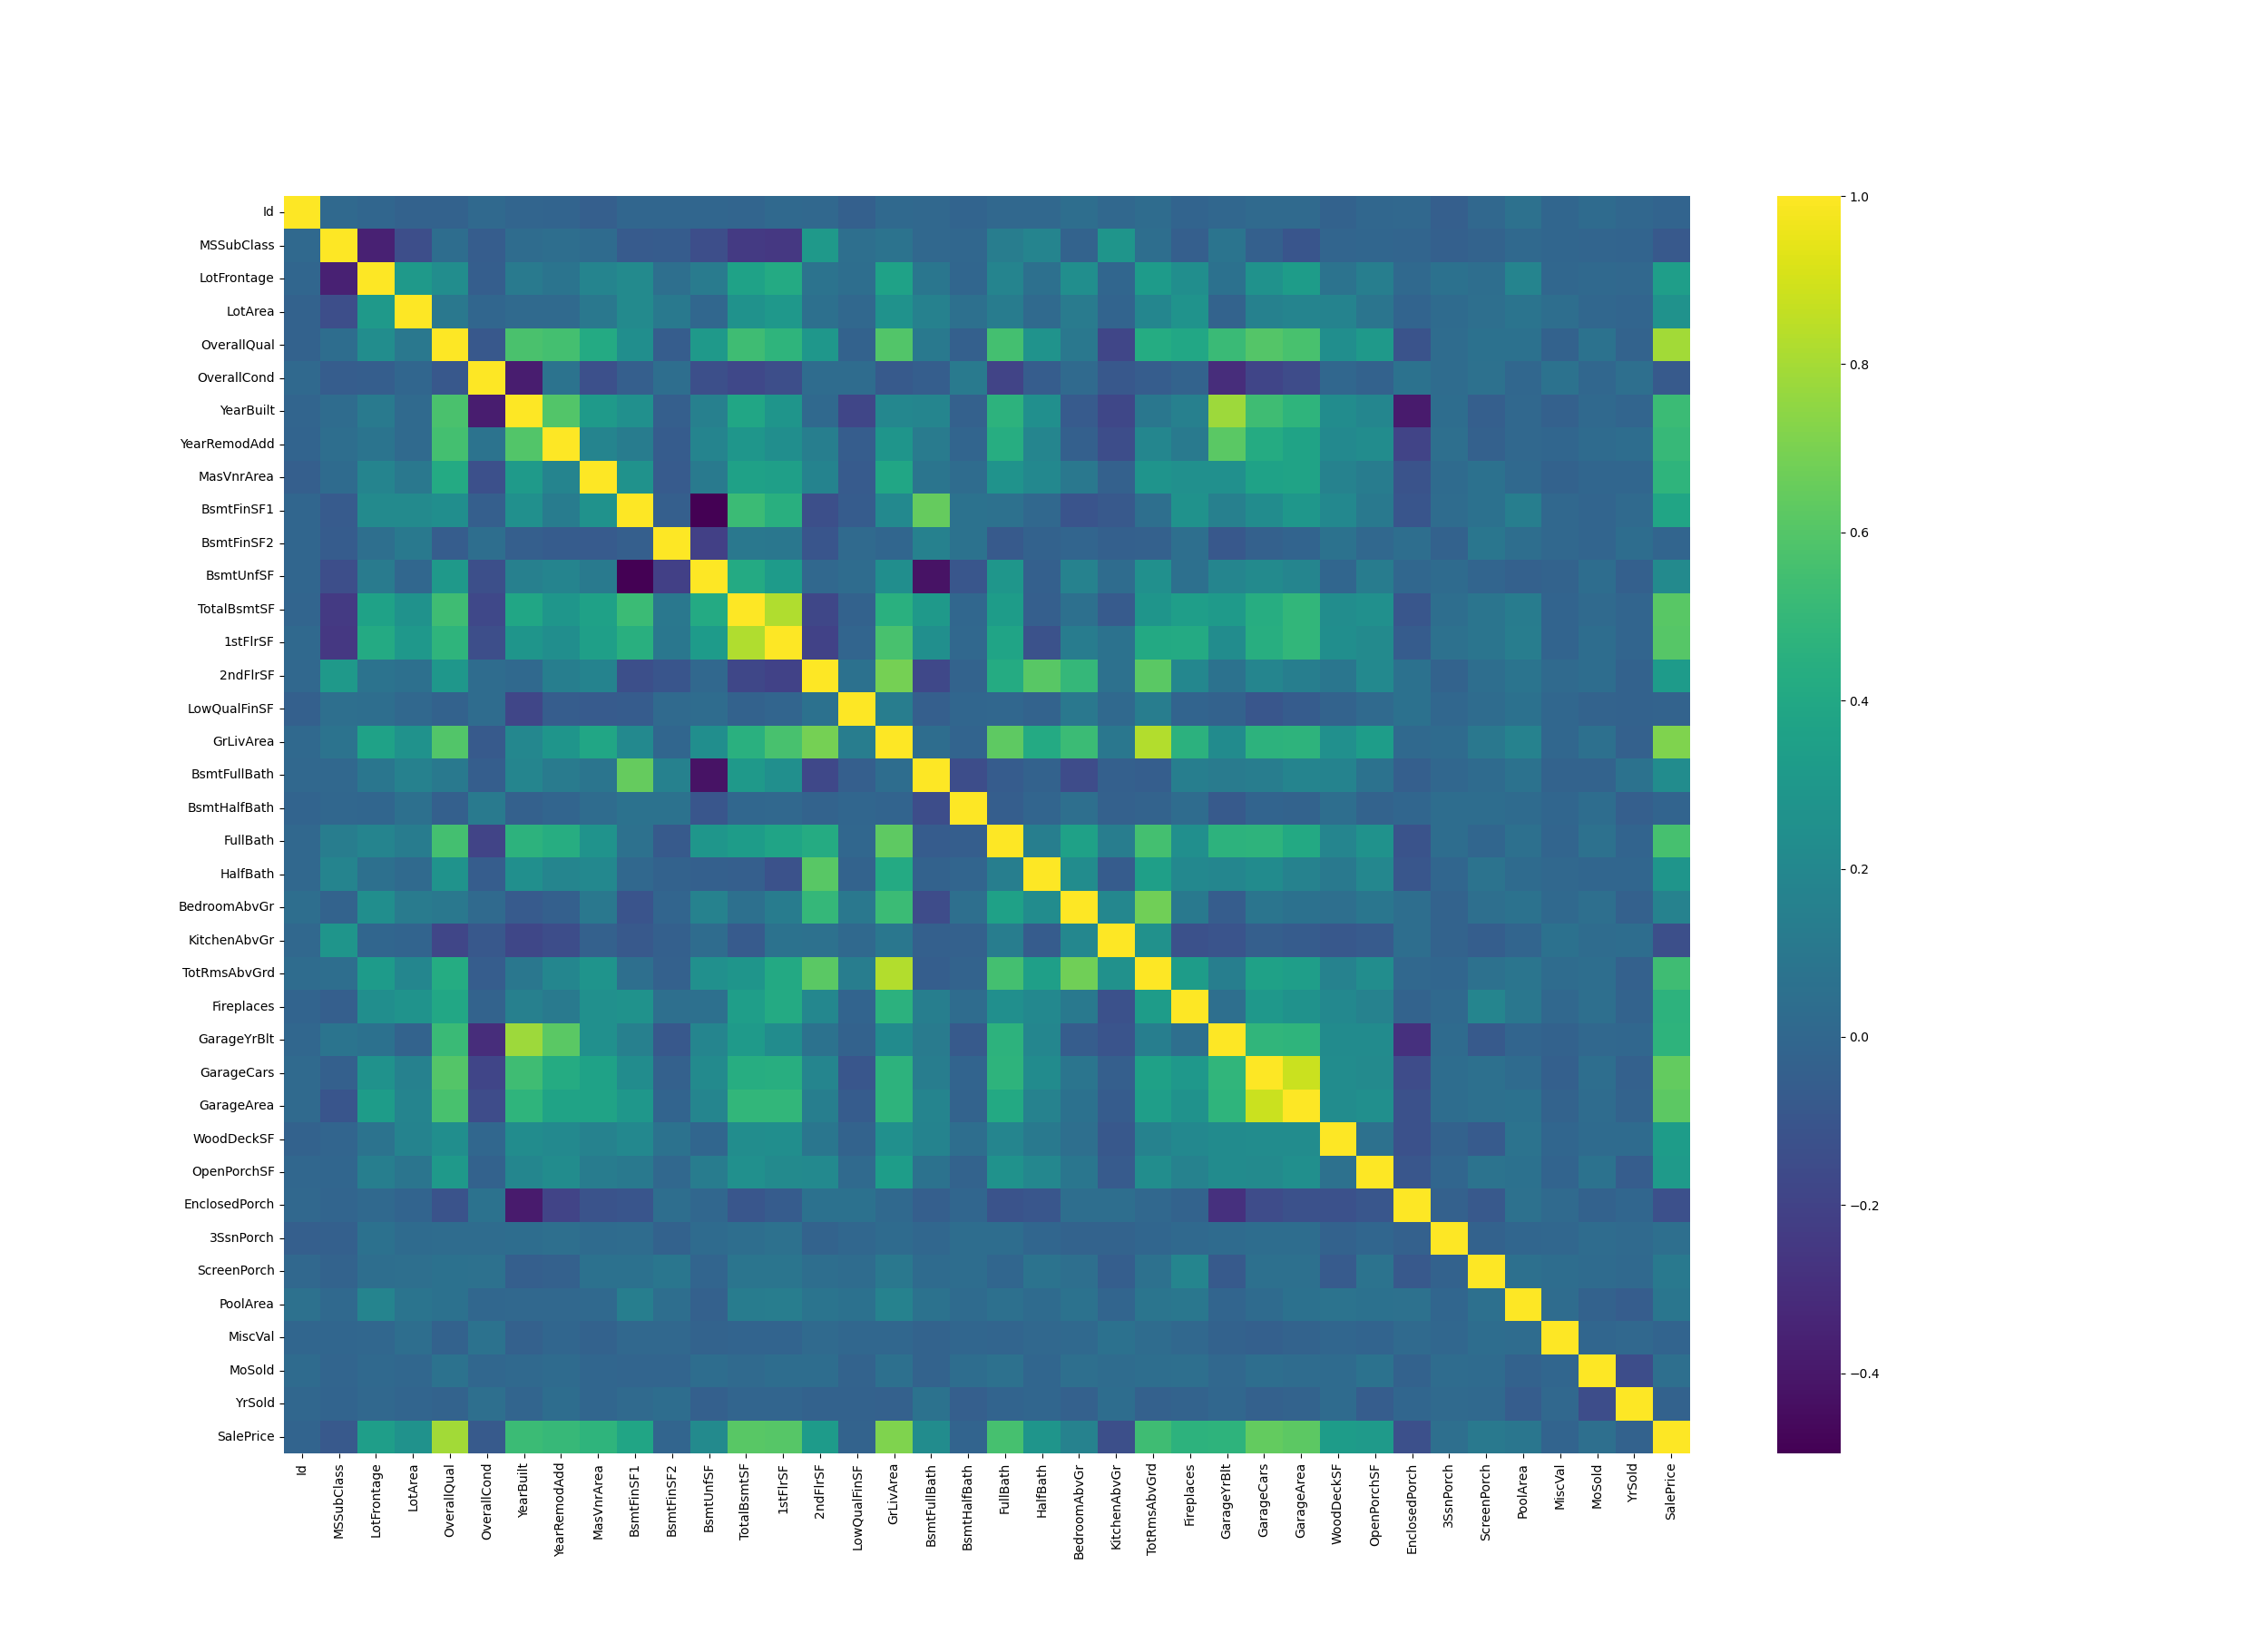

In [216]:
plt.figure(figsize=(25,18))
sns.heatmap(surprisehousing.corr(),cmap='viridis')
plt.show()

In [217]:
# We will first check the heat map to see which features affect target variable more

In [218]:
# We will first check the heat map to see which features affect target variable more
# OverallQual, TotalBsmtSF, 1stFlrSF, GrLivArea, FullBath, TotRmsAbvGrd, Fireplaces, GarageYrBlt, GarageArea, GarageCars - Positive Correlation
# EnclosedPorch, KitchenAbvGr - Negative correlation

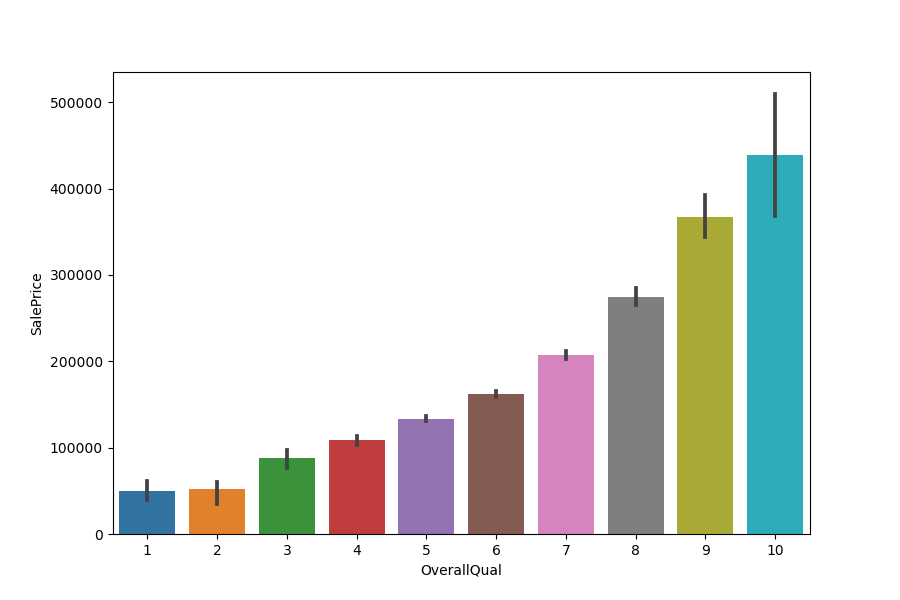

In [219]:
plt.figure(figsize=(9,6))
sns.barplot(data=surprisehousing,x='OverallQual',y='SalePrice')
plt.show()

- Properties with good quality definitely has more cost as expected

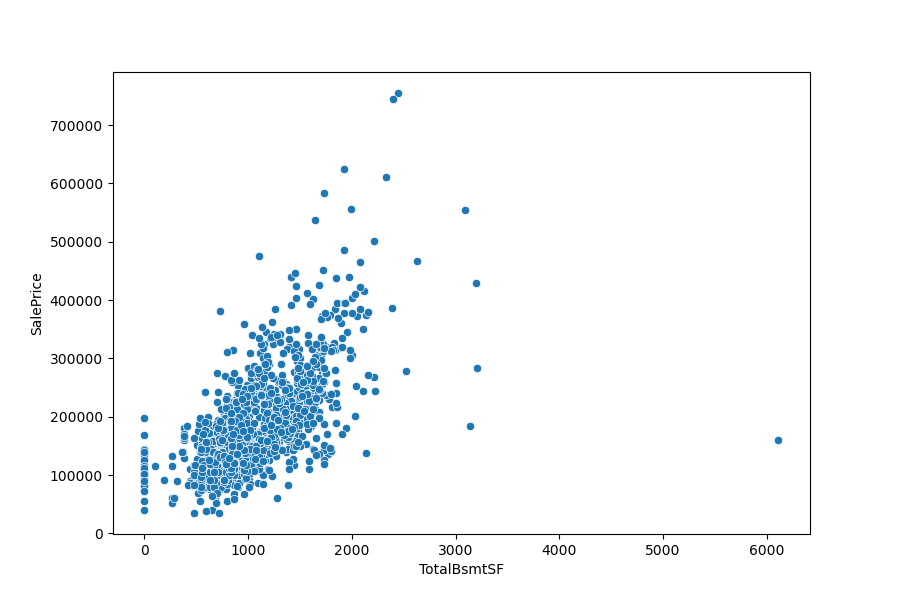

In [220]:
plt.figure(figsize=(9,6))
sns.scatterplot(data=surprisehousing,x='TotalBsmtSF',y='SalePrice')
plt.show()

- As the Square feet area increases Sale Price increases

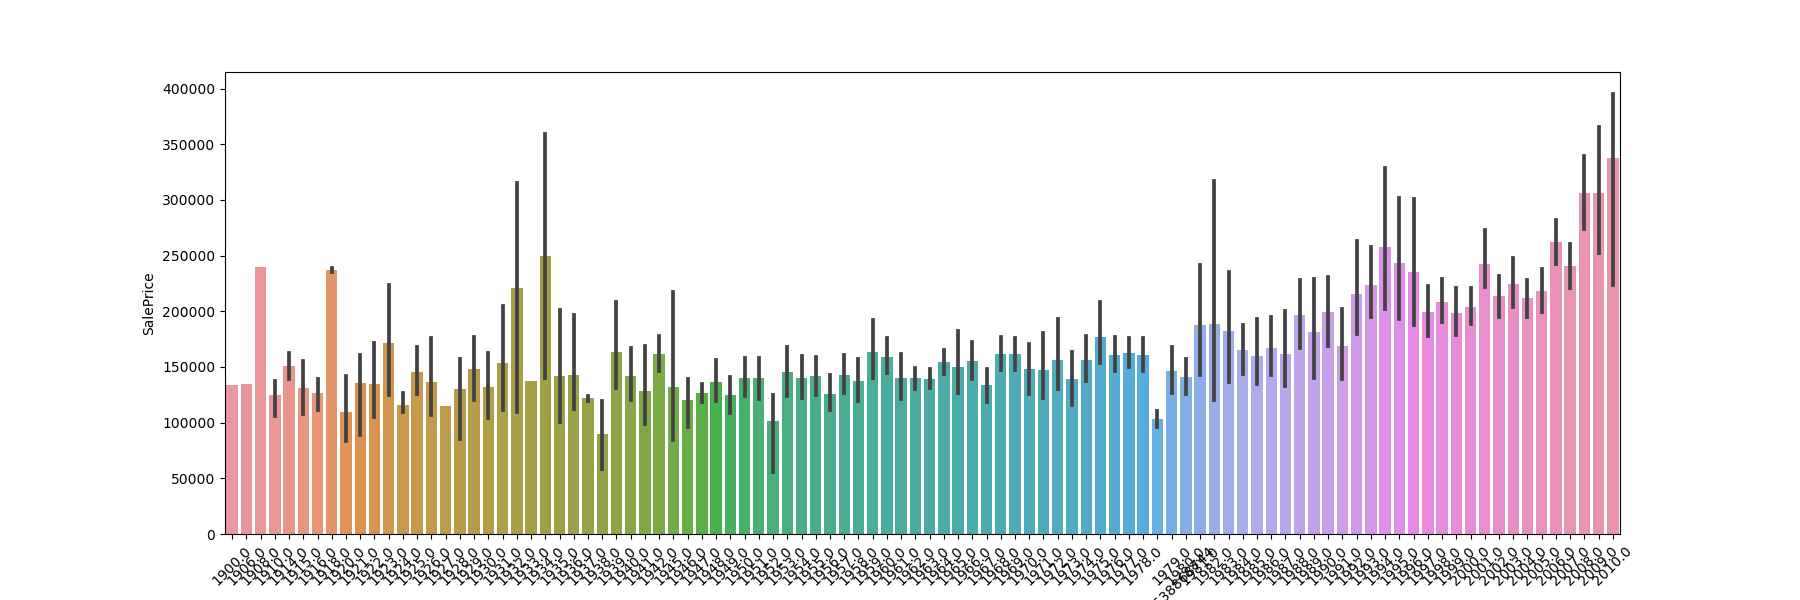

In [221]:
plt.figure(figsize=(18,6))
plt.xticks(rotation=45)
sns.barplot(data=surprisehousing,x='GarageYrBlt',y='SalePrice')
plt.show()

- Garage year built has no significant impact on the Saleprice. However latest Garages show more price, that may be because the property is new

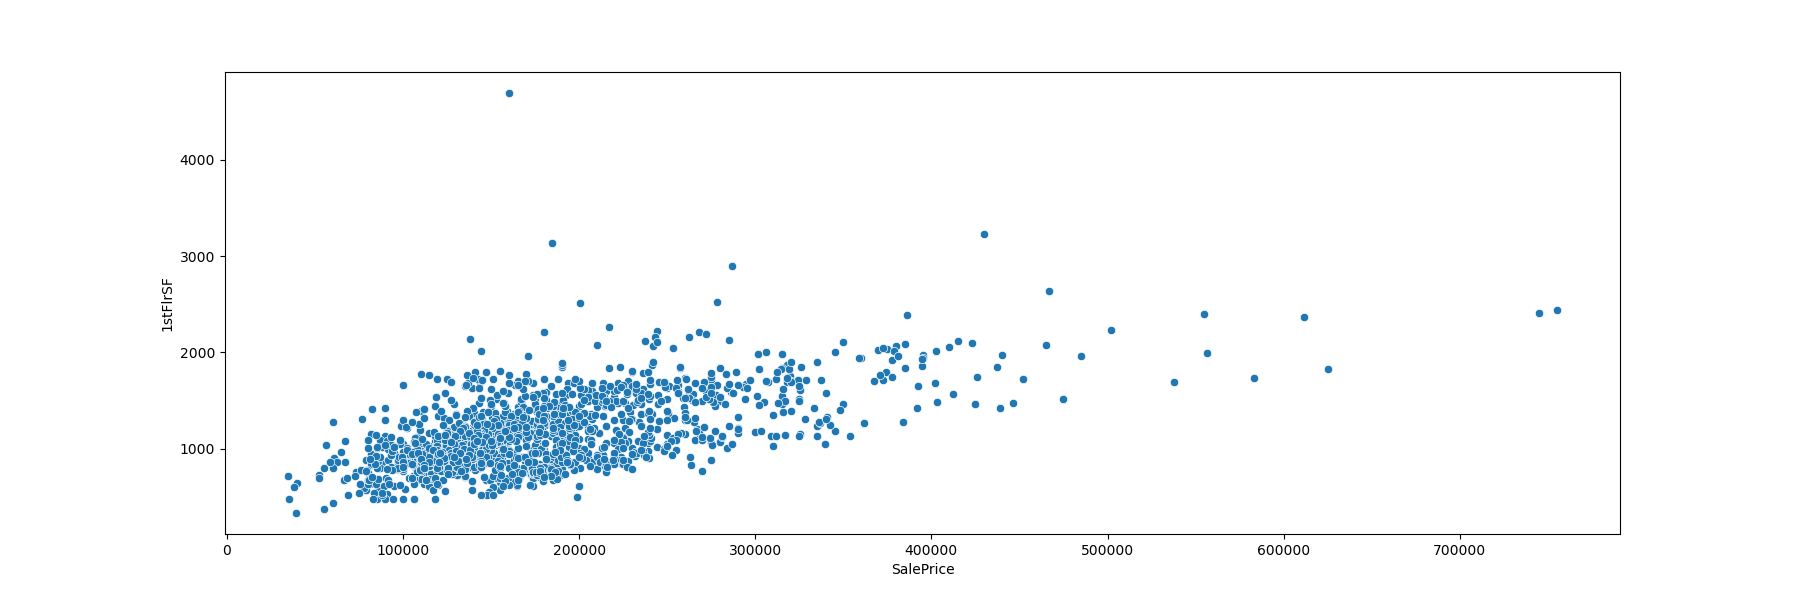

In [222]:
plt.figure(figsize=(18,6))
sns.scatterplot(data=surprisehousing,x='SalePrice',y='1stFlrSF')
plt.show()

- First floor size is not very much impacting the SalePrice

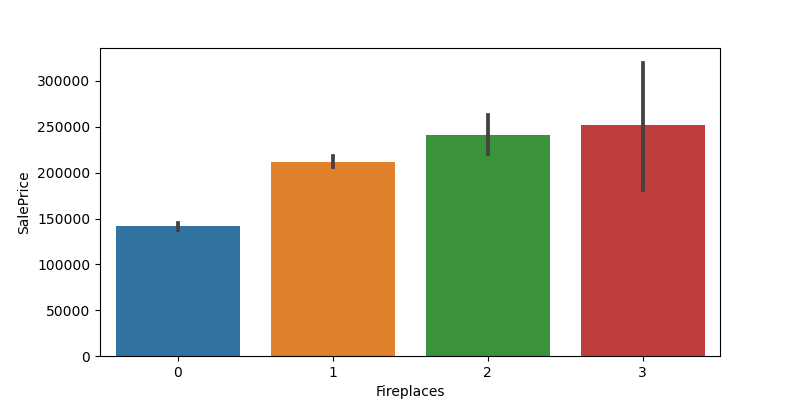

In [223]:
plt.figure(figsize=(8,4))
sns.barplot(data=surprisehousing,x='Fireplaces',y='SalePrice')
plt.show()

- More the fireplaces, more the SalePrice is general trend observed

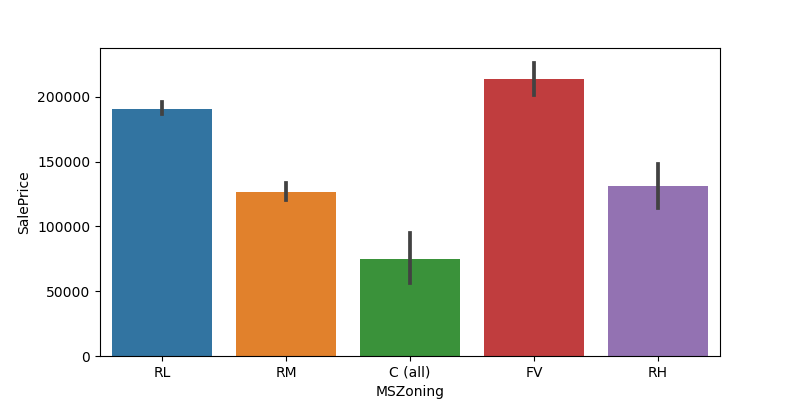

In [224]:
plt.figure(figsize=(8,4))
sns.barplot(data=surprisehousing,x='MSZoning',y='SalePrice')
plt.show()

- Floating Village Residential has highest price followed by Residential Low Density
- Residential High and Medium density has almost same Sale Price around 120000
- Less cost for commercial land
- There is no sale in Agriculture, Industrial and Residential Low Density Park lands

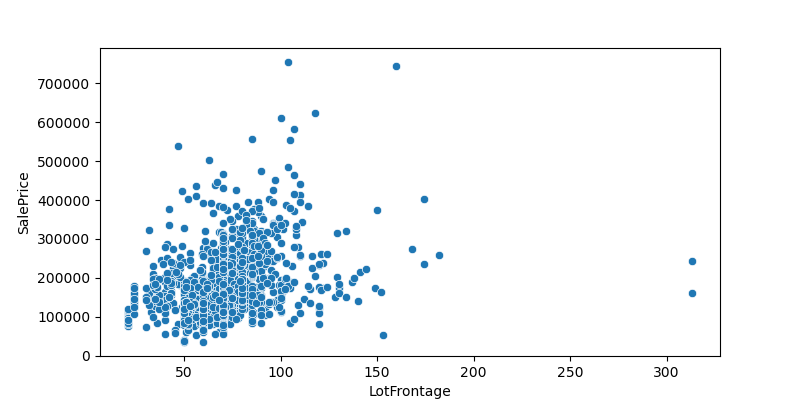

In [225]:
sns.scatterplot(data=surprisehousing,x='LotFrontage',y='SalePrice')
plt.show()

- LotFrontage has no significant impact on SalePrice, which can be visible from plot above indicating, the linear feet of street does not matter on the SalePrice

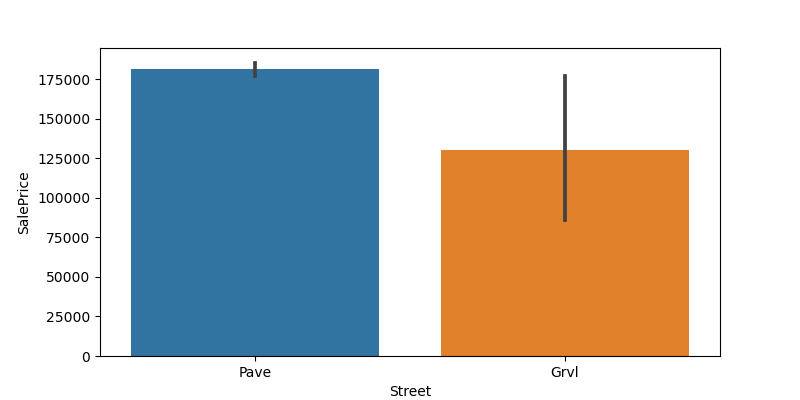

In [226]:
plt.figure(figsize=(8,4))
sns.barplot(data=surprisehousing,x='Street',y='SalePrice')
plt.show()

- Plots with Pavement are more priced than the Gravel 

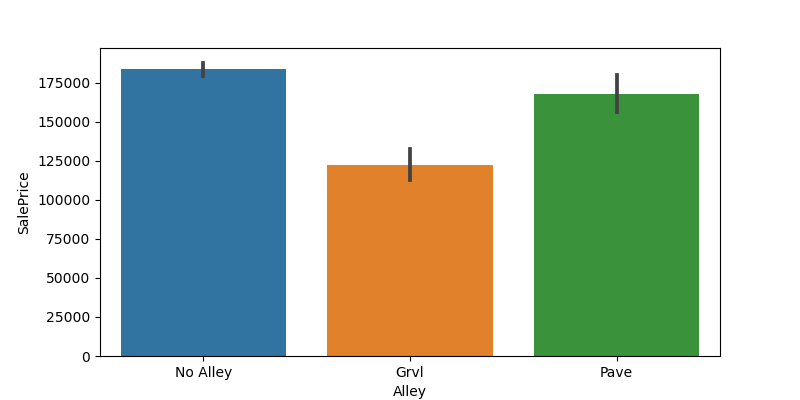

In [227]:
plt.figure(figsize=(8,4))
sns.barplot(data=surprisehousing,x='Alley',y='SalePrice')
plt.show()

- Plots which have Alley and Pavement in the front has more cost compared to the Gravel 

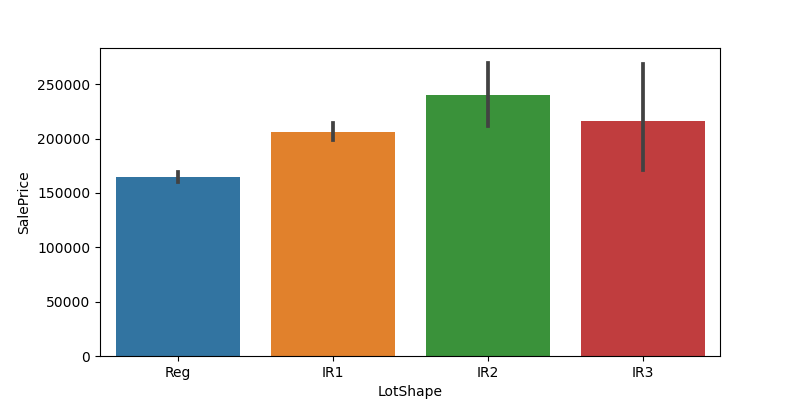

In [228]:
plt.figure(figsize=(8,4))
sns.barplot(data=surprisehousing,x='LotShape',y='SalePrice')
plt.show()

- Its strange to observe Regular shape property has low Sale price and moderately irregular shaped ones are most costly

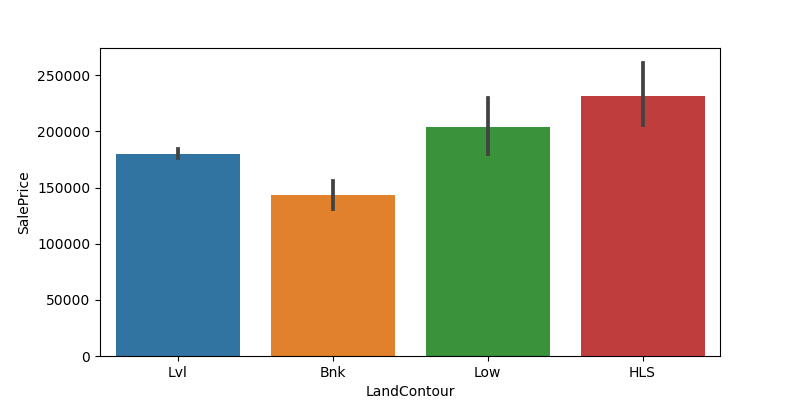

In [229]:
plt.figure(figsize=(8,4))
sns.barplot(data=surprisehousing,x='LandContour',y='SalePrice')
plt.show()

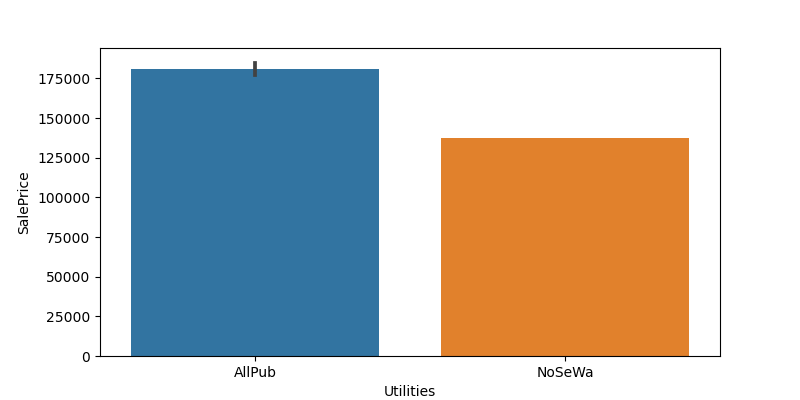

In [230]:
plt.figure(figsize=(8,4))
sns.barplot(data=surprisehousing,x='Utilities',y='SalePrice')
plt.show()

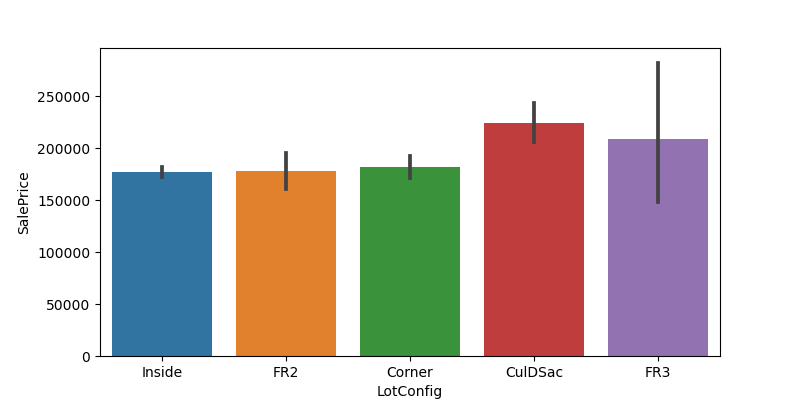

In [231]:
plt.figure(figsize=(8,4))
sns.barplot(data=surprisehousing,x='LotConfig',y='SalePrice')
plt.show()  ## no much influence on SalePrice - LandSlope and LotConfig

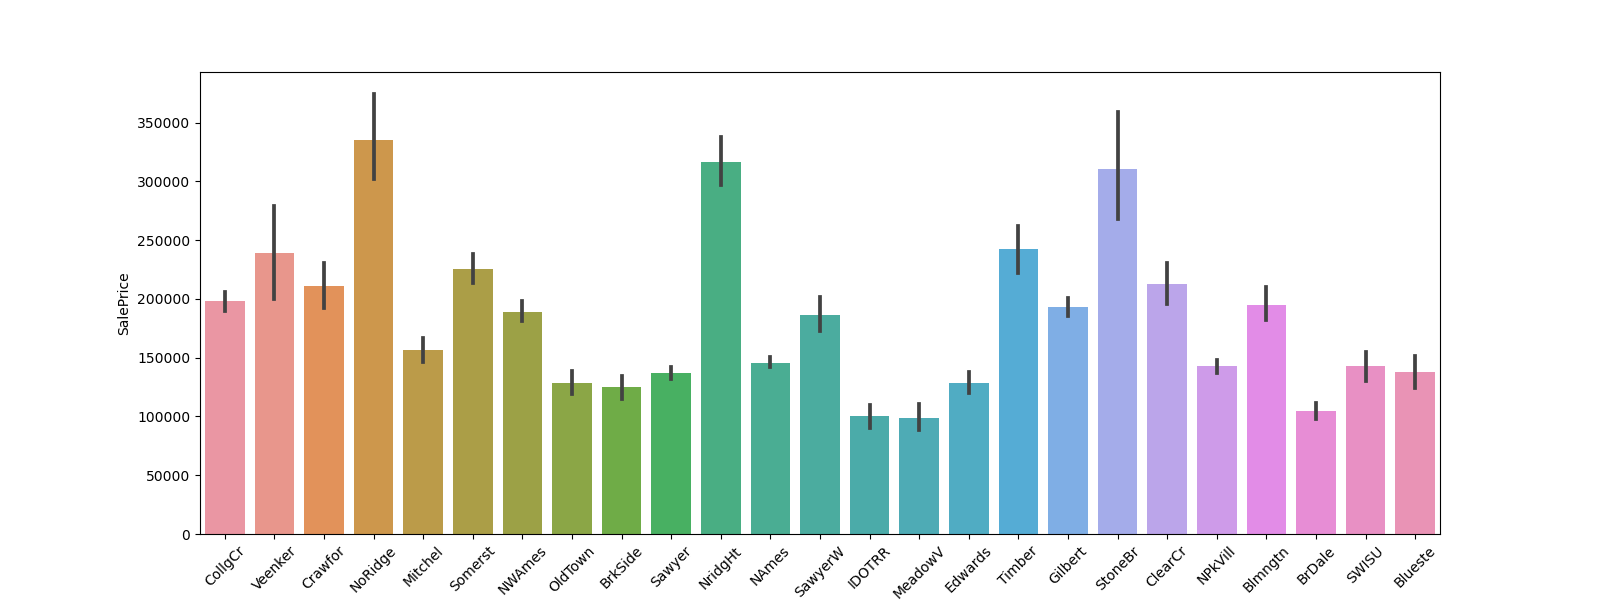

In [232]:
plt.figure(figsize=(16,6))
plt.xticks(rotation=45)
sns.barplot(data=surprisehousing,x='Neighborhood',y='SalePrice')
plt.show()  ## influences the plot SalePrice

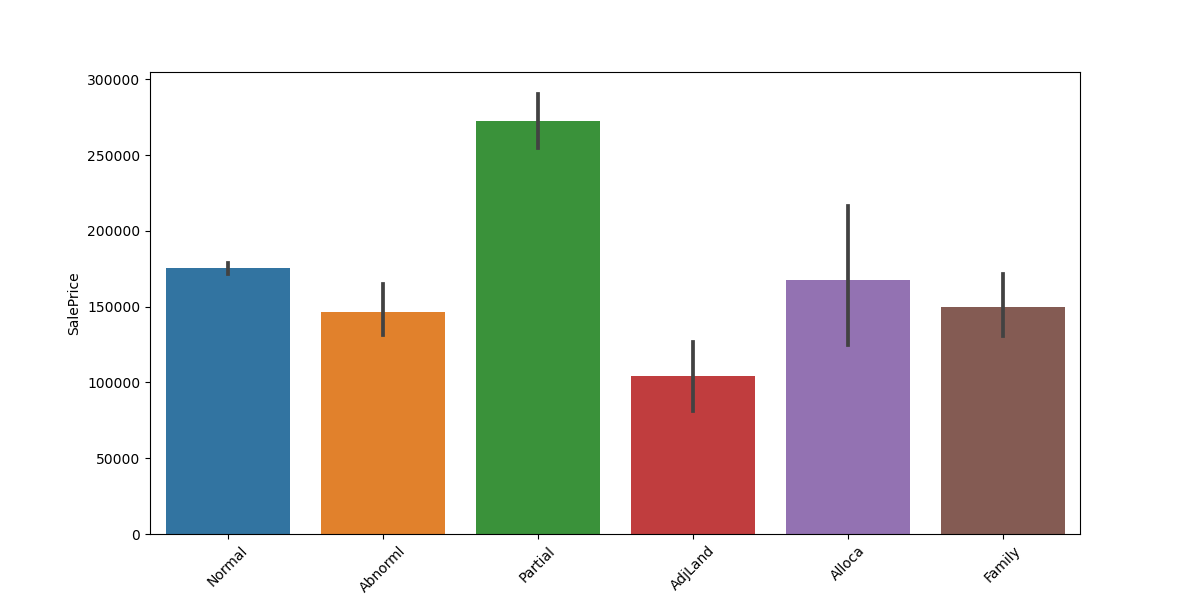

In [233]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=45)
sns.barplot(data=surprisehousing,x='SaleCondition',y='SalePrice')
plt.show()  ## influences the plot SalePrice

- Partial SaleCondition meaning new lands have more cost than compared to others

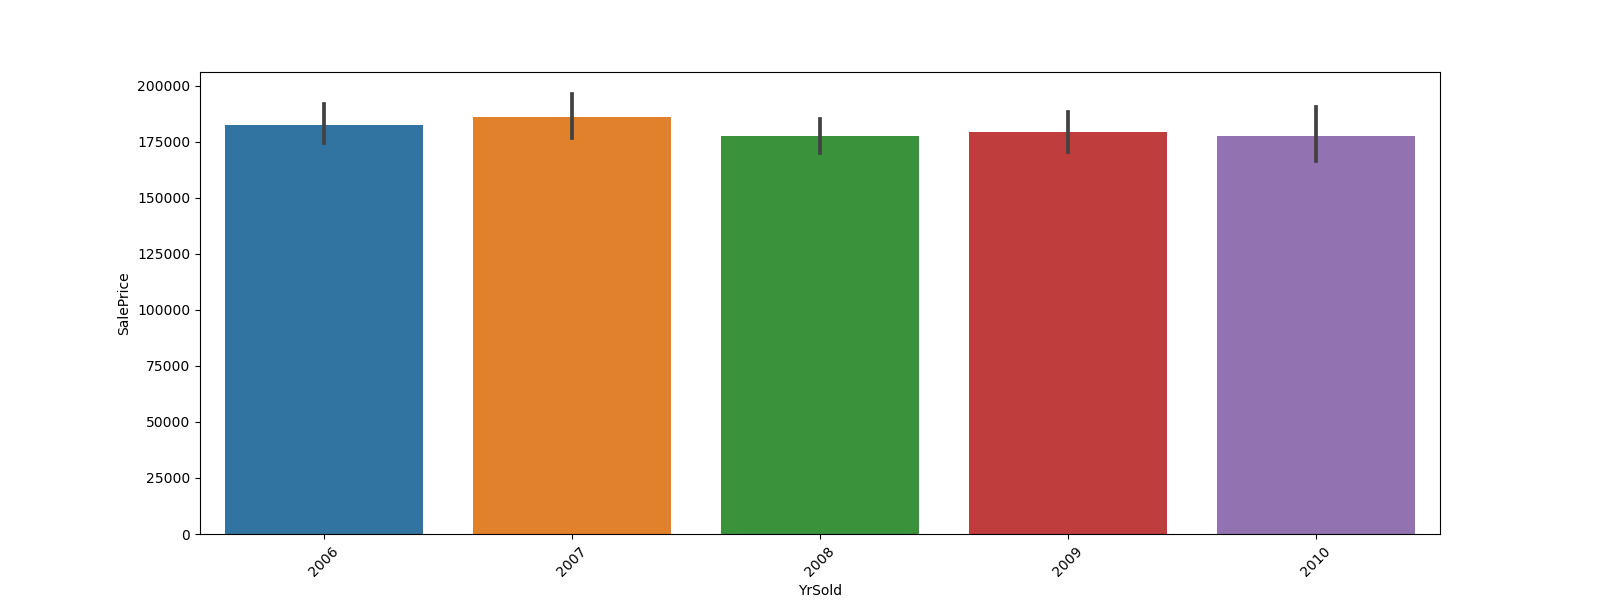

In [234]:
plt.figure(figsize=(16,6))
plt.xticks(rotation=45)
sns.barplot(data=surprisehousing,x='YrSold',y='SalePrice')
plt.show()  ## influences the plot SalePrice

- Year sold has no major impact on the SalePrice, its almost the same

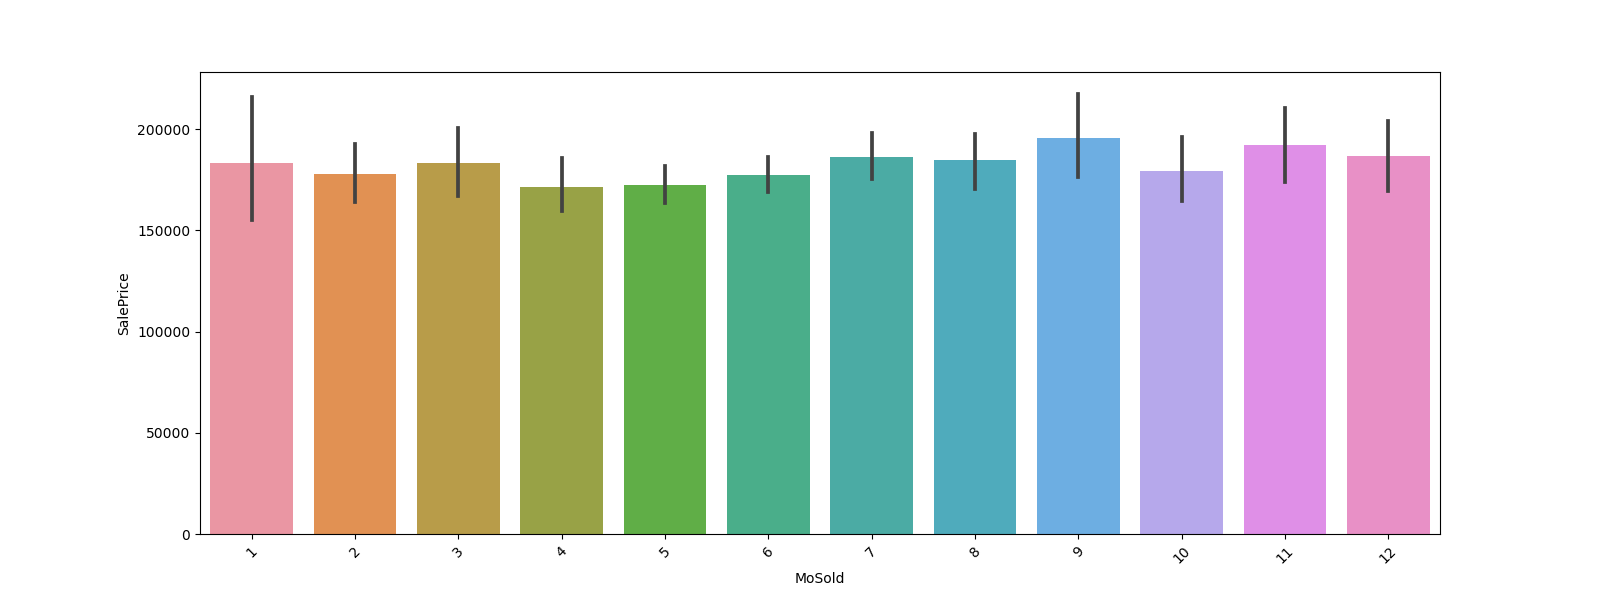

In [235]:
plt.figure(figsize=(16,6))
plt.xticks(rotation=45)
sns.barplot(data=surprisehousing,x='MoSold',y='SalePrice')
plt.show()  ## influences the plot SalePrice

- Same with month sold

### Lets check for Outliers

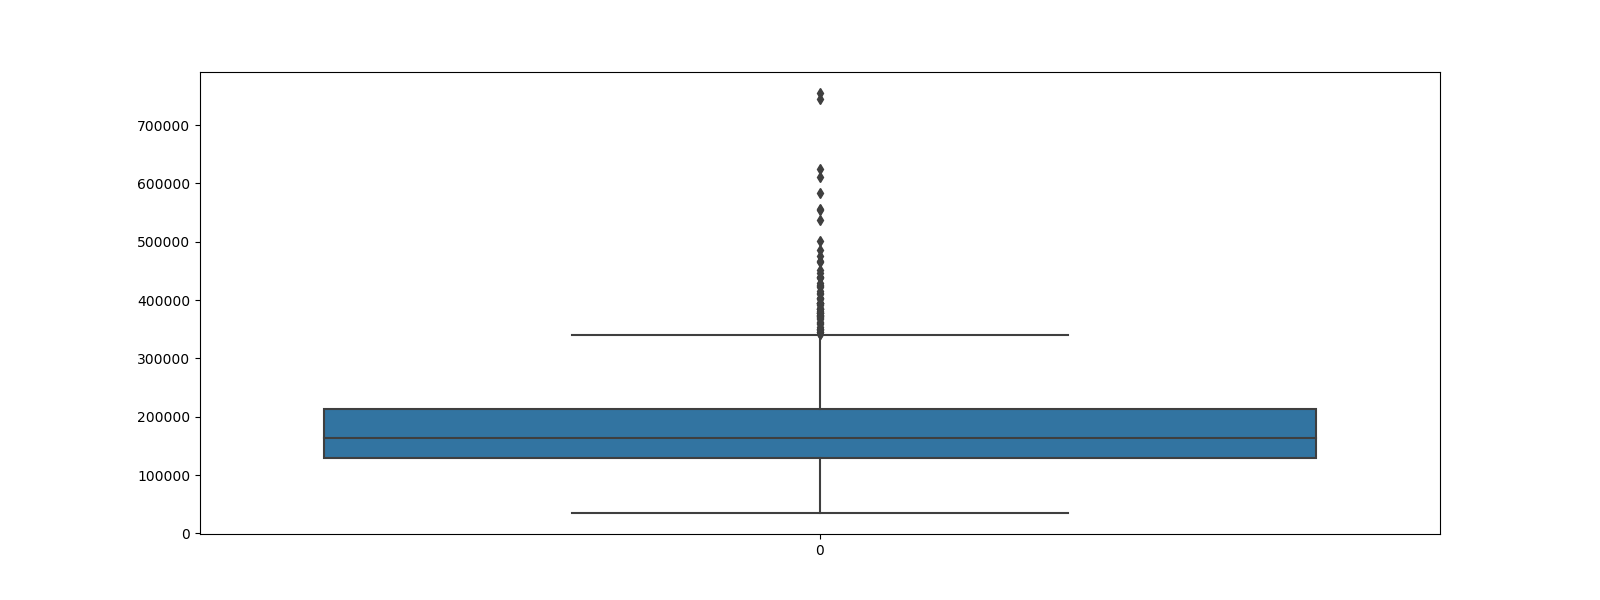

In [236]:
sns.boxplot(surprisehousing['SalePrice'])
plt.show()

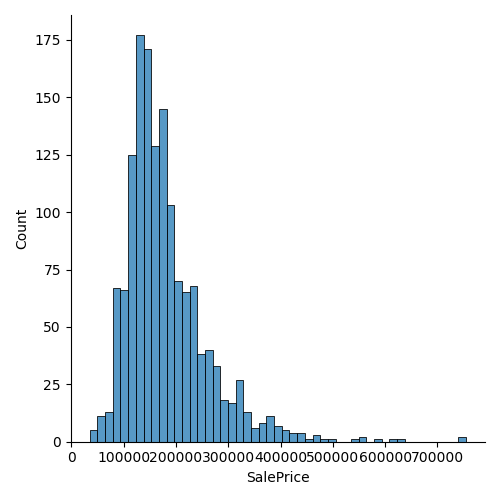

In [237]:
sns.displot(surprisehousing['SalePrice'])
plt.show()

- SalePrice is normally distributed


## Based on OLS summary, deleting few cols here

In [238]:
surprisehousing.drop(['Neighborhood','Condition1','Condition2','RoofStyle','ExterCond','Exterior1st','Exterior2nd','BsmtCond','BsmtFinSF1','BsmtFinSF2','HeatingQC','GarageQual','LandContour','LotConfig','Fireplaces'],axis=1,inplace=True)

In [239]:
# Deleting few more

surprisehousing.drop(['MSSubClass','LowQualFinSF','BsmtHalfBath','HalfBath','FullBath','GarageCond','GarageType','GarageYrBlt','MiscVal','LotShape','LandSlope','Foundation','Functional','Electrical','BsmtExposure','BsmtFinType1','BsmtFinType2','MasVnrType','PavedDrive','SaleType','SaleCondition','HouseStyle','Heating','Utilities'],axis=1,inplace=True)

### OneHotEncoding - For categorical variables

In [240]:
cat_cols = surprisehousing.select_dtypes('object').columns

In [241]:
cat_cols

Index(['MSZoning', 'Street', 'Alley', 'BldgType', 'RoofMatl', 'ExterQual',
       'BsmtQual', 'CentralAir', 'KitchenQual', 'FireplaceQu', 'GarageFinish',
       'PoolQC', 'Fence'],
      dtype='object')

In [242]:
# Onehotencoding
cat_cols_encoded = pd.get_dummies(surprisehousing[cat_cols],drop_first=True)

In [243]:
# Now we can delete the actual object cols keeping the encoded columns

for cols in cat_cols:
    surprisehousing.drop([cols],axis=1,inplace=True)

In [244]:
surprisehousing = pd.concat([surprisehousing,cat_cols_encoded],axis=1)

In [245]:
pd.set_option('display.max_columns',None)

In [246]:
surprisehousing.head(2)

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_No Alley,Alley_Pave,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,CentralAir_Y,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageFinish_RFn,GarageFinish_Unf,PoolQC_Fair,PoolQC_Good,PoolQC_No Pool,Fence_Good Wood,Fence_Min Privacy,Fence_Min wood wire,Fence_No Fence
0,1,65.0,8450,7,5,2003,2003,196.0,150,856,856,854,1710,1,3,1,8,2,548,0,61,0,0,0,0,2,2008,208500,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
1,2,80.0,9600,6,8,1976,1976,0.0,284,1262,1262,0,1262,0,3,1,6,2,460,298,0,0,0,0,0,5,2007,181500,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1


In [247]:
surprisehousing.shape

(1460, 69)

In [248]:
surprisehousing.select_dtypes('object') # no object cols

""
0
1
2
3
4
...
1455
1456
1457
1458


In [249]:
pd.DataFrame(surprisehousing.dtypes)[0].unique() # all integer cols now

array([dtype('int64'), dtype('float64'), dtype('uint8')], dtype=object)

## Train test split

In [250]:
X = surprisehousing.drop(['SalePrice'],axis=1)
y = surprisehousing['SalePrice']

In [251]:
X.head(2)

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_No Alley,Alley_Pave,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,CentralAir_Y,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageFinish_RFn,GarageFinish_Unf,PoolQC_Fair,PoolQC_Good,PoolQC_No Pool,Fence_Good Wood,Fence_Min Privacy,Fence_Min wood wire,Fence_No Fence
0,1,65.0,8450,7,5,2003,2003,196.0,150,856,856,854,1710,1,3,1,8,2,548,0,61,0,0,0,0,2,2008,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
1,2,80.0,9600,6,8,1976,1976,0.0,284,1262,1262,0,1262,0,3,1,6,2,460,298,0,0,0,0,0,5,2007,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1


In [252]:
y.head(2)

0    208500
1    181500
Name: SalePrice, dtype: int64

In [253]:
X.shape

(1460, 68)

In [254]:
y.shape

(1460,)

## Model Building

In [255]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=100)

In [256]:
print(X_train.shape,y_train.shape)

(1021, 68) (1021,)


In [257]:
print(X_test.shape,y_test.shape)

(439, 68) (439,)


In [258]:
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)

In [259]:
lr = sm.OLS(y_train,X_train_sm).fit()

In [260]:
#lr.params

In [261]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     116.9
Date:                Wed, 09 Nov 2022   Prob (F-statistic):               0.00
Time:                        19:38:48   Log-Likelihood:                -11830.
No. Observations:                1021   AIC:                         2.380e+04
Df Residuals:                     953   BIC:                         2.413e+04
Df Model:                          67                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -2.294e+06   1

#### Observations:

- R-squared value is 89.1 % which is good
- Adjusted R2 also is very close to R2 (88.4%)

### Recursive Feature Elimination

In [262]:
# First lets remove the feature which has highest pvalue
# Based on above values we can remove these columns easily as they indicate very high p-value:
# MiscVal
# BsmtFinSF2       
# Halfbath

### Observations

- Already done RFE based on the OLS summary and removed columns in the start while doing encoding. Please refer there.
- Done this way, because its difficult to eliminate the encoded columns which have high p-value as they are more in number
- So removed the entire column while doing OHE

### Model validation using Test dataframe

In [263]:
X_test_sm = sm.add_constant(X_test)
lr_test = sm.OLS(y_test,X_test_sm).fit()

In [264]:
print(lr_test.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     49.04
Date:                Wed, 09 Nov 2022   Prob (F-statistic):          4.54e-146
Time:                        19:41:39   Log-Likelihood:                -5092.4
No. Observations:                 439   AIC:                         1.031e+04
Df Residuals:                     375   BIC:                         1.057e+04
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                6.988e+05   1

## Observations:

- R2 is 89.2 and adjusted R2 87.4 which is very good

### Observations

- pvalue for all features is low
- R2 and adj R2 are also high for test

## REGULARIZATION

### Scaling

In [266]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge,Lasso,LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [267]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [268]:
reg = LinearRegression()
reg.fit(X_train,y_train.values)

LinearRegression()

In [269]:
y_pred = reg.predict(X_test)

In [272]:
#print(y_test)

In [273]:
#print(y_pred)

In [274]:
r2_score(y_test,y_pred)

0.12624397728400205

### Ridge Regression

In [296]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.1)
ridge.fit(X_train,y_train)
y_pred = ridge.predict(X_test)
print('Slope: ',ridge.coef_[0])
print('Intercept: ',ridge.intercept_)
from sklearn.metrics import mean_squared_error
print('Mean square error: ',mean_squared_error(y_test,y_pred))
print('Root mean square error: ',np.sqrt(mean_squared_error(y_test,y_pred)))
print('Ridge Score: ',ridge.score(X_test,y_test))

Slope:  1.114299309246292
Intercept:  686076.2056792208
Mean square error:  1771823938.89064
Root mean square error:  42093.03907881492
Ridge Score:  0.7247323534374737


## Lasso Regression

In [298]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
y_pred = lasso.predict(X_test)
print('Slope: ',lasso.coef_[0])
print('Intercept: ',lasso.intercept_)
from sklearn.metrics import mean_squared_error
print('Mean square error: ',mean_squared_error(y_test,y_pred))
print('Root mean square error: ',np.sqrt(mean_squared_error(y_test,y_pred)))
print('Lasso Score: ',lasso.score(X_test,y_test))

/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.519e+11, tolerance: 6.382e+08
  model = cd_fast.enet_coordinate_descent(


Slope:  1.108963021083777
Intercept:  -728027.1911669106
Mean square error:  1477910435.9927742
Root mean square error:  38443.60071575989
Lasso Score:  0.7703942707757727


### Observations
- Lasso has performed better than Ridge

###### Lets try changing alpha

In [332]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=12)
ridge.fit(X_train,y_train)
y_pred = ridge.predict(X_test)
print('Slope: ',ridge.coef_[0])
print('Intercept: ',ridge.intercept_)
from sklearn.metrics import mean_squared_error
print('Mean square error: ',mean_squared_error(y_test,y_pred))
print('Root mean square error: ',np.sqrt(mean_squared_error(y_test,y_pred)))
print('Ridge Score: ',ridge.score(X_test,y_test))

Slope:  -0.722153254965907
Intercept:  1852716.9248652938
Mean square error:  1020415750.8342957
Root mean square error:  31943.947014016532
Ridge Score:  0.8414698909512663


In [333]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=2)
lasso.fit(X_train,y_train)
y_pred = lasso.predict(X_test)
print('Slope: ',lasso.coef_[0])
print('Intercept: ',lasso.intercept_)
from sklearn.metrics import mean_squared_error
print('Mean square error: ',mean_squared_error(y_test,y_pred))
print('Root mean square error: ',np.sqrt(mean_squared_error(y_test,y_pred)))
print('Lasso Score: ',lasso.score(X_test,y_test))

/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.588e+11, tolerance: 6.382e+08
  model = cd_fast.enet_coordinate_descent(


Slope:  1.1550616362535053
Intercept:  -388314.32503612724
Mean square error:  1388080894.6594126
Root mean square error:  37256.95766778888
Lasso Score:  0.7843500402469242


### Important predictor variables

In [335]:
lasso.feature_names_in_

array(['Id', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MoSold', 'YrSold',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'Street_Pave', 'Alley_No Alley', 'Alley_Pave', 'BldgType_2fmCon',
       'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE',
       'RoofMatl_CompShg', 'RoofMatl_Membran', 'RoofMatl_Metal',
       'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake',
       'RoofMatl_WdShngl', 'ExterQual_Fa', 'ExterQual_Gd', 'ExterQual_TA',
       'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_TA', 'CentralAir_Y',
       'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA',
       'FireplaceQu_Fa', 'FireplaceQu_Gd', 'FireplaceQ

In [336]:
ridge.feature_names_in_

array(['Id', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MoSold', 'YrSold',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'Street_Pave', 'Alley_No Alley', 'Alley_Pave', 'BldgType_2fmCon',
       'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE',
       'RoofMatl_CompShg', 'RoofMatl_Membran', 'RoofMatl_Metal',
       'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake',
       'RoofMatl_WdShngl', 'ExterQual_Fa', 'ExterQual_Gd', 'ExterQual_TA',
       'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_TA', 'CentralAir_Y',
       'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA',
       'FireplaceQu_Fa', 'FireplaceQu_Gd', 'FireplaceQ